In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

In [3]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
import torchvision.transforms as T
import random
class RandomRGBTint:
    def __call__(self, img):
        r = random.uniform(0.5, 1.5)
        g = random.uniform(0.5, 1.5)
        b = random.uniform(0.5, 1.5)
        img = F.to_tensor(img)
        img[0] *= r
        img[1] *= g
        img[2] *= b
        return torch.clamp(img, 0, 1)

In [5]:
import torchvision.transforms as T
import torchvision.transforms.functional as F

transform = T.Compose([
    T.Resize((28, 28)),
    T.Grayscale(num_output_channels=3),
    T.RandomAffine(degrees=15, translate=(0.1, 0.1)),
    T.ColorJitter(0.3, 0.3, 0.3, 0.1),
    RandomRGBTint() 
])


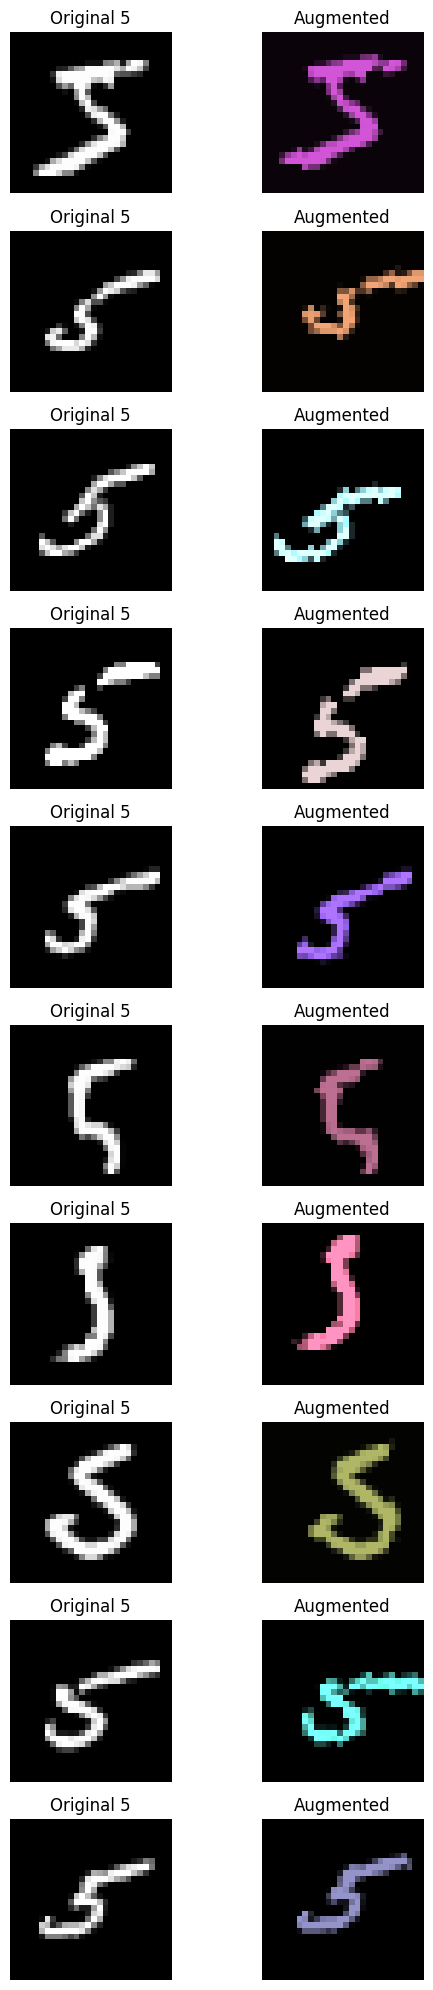

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch

label = 5
indices = np.where(y_train == label)[0][:10]

# Create original and augmented lists
originals = [X_train[idx] for idx in indices]
augmented = []
for idx in indices:
    img_pil = Image.fromarray(X_train[idx]).convert('L')
    aug = transform(img_pil).permute(1, 2, 0).numpy()
    augmented.append(aug)

# Plotting (10 rows, 2 columns)
fig, axes = plt.subplots(10, 2, figsize=(6, 20))

for i in range(10):
    # Original (left column)
    axes[i][0].imshow(originals[i], cmap='gray')
    axes[i][0].set_title(f"Original {label}")
    axes[i][0].axis('off')

    # Augmented (right column)
    axes[i][1].imshow(augmented[i])
    axes[i][1].set_title("Augmented")
    axes[i][1].axis('off')

# Set column labels
axes[0][0].set_xlabel("Original", fontsize=14)
axes[0][1].set_xlabel("Augmented", fontsize=14)

plt.tight_layout()
plt.show()
